Section 1. Data Analysis

In [2]:
# take a look at the dataset

import pandas as pd
data = pd.read_csv('Existing_Base.csv')
pd.set_option('display.max_columns', None) # without this, some columns get truncated at display
data.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [3]:
# number of rows and columns in our dataset

data.shape

(10155, 32)

In [4]:
# target class distribution
#### There is class imbalance in my dataset. We might ask for more observations for class 1.

#### if the distribution is 80%-20% - generally not a major concern.
#### if the distribution is between 80%-20% and 95%-5% -  area of slight concern..
#### if the distribution is less than 95-5% - we should get concerned - expect that your model might be a bad model
##### There is class imbalance in my data 
#### We will have to do something to reduce the imbalance

# our dataset is 90-10% - area of slight concern

data['Revenue Grid'].value_counts()

2    9069
1    1086
Name: Revenue Grid, dtype: int64

In [5]:
data.info()

# 18 numeric and 14 string columns
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

In [6]:
# The first task is to remove the columns that do not have an impact on the target variable.

# let us investigate the impact of couple of numeric columns on the target variable
# Online Purchase amount which feels potentially like having an impact on target and year_last_moved which doesnt look like having an impact

data.groupby(['Revenue Grid']).agg({'Online Purchase Amount': 'mean'})


,Online Purchase Amount
Revenue Grid,
1,118.808066
2,7.230388


In [7]:
data.groupby(['Revenue Grid']).agg({'year_last_moved': 'mean'})

,year_last_moved
Revenue Grid,
1,1978.090239
2,1967.213144


<AxesSubplot:xlabel='Revenue Grid', ylabel='Online Purchase Amount'>

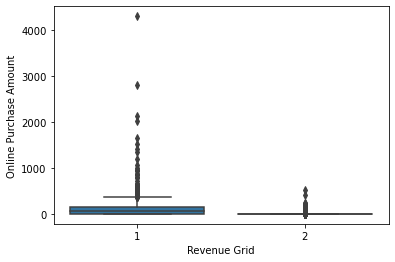

In [8]:
# From the above 2 it is quite clear that Online Purchase Amount has an impact on target and year_last_moved does not have an impact
# We can confirm the same though boxplots as well
# boxplots look different for 1 and 2

import seaborn as sns
sns.boxplot(x = 'Revenue Grid', y = 'Online Purchase Amount', data = data)

<AxesSubplot:xlabel='Revenue Grid', ylabel='year_last_moved'>

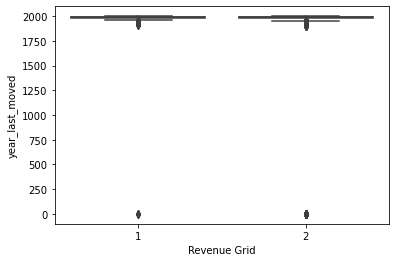

In [9]:
sns.boxplot(x = 'Revenue Grid', y = 'year_last_moved', data = data)
# boxplots look the same

In [10]:
# Segregate the numeric columns

import numpy as np

numeric_columns = data.select_dtypes(include = np.number)
numeric_columns
print(numeric_columns.index)

RangeIndex(start=0, stop=10155, step=1)


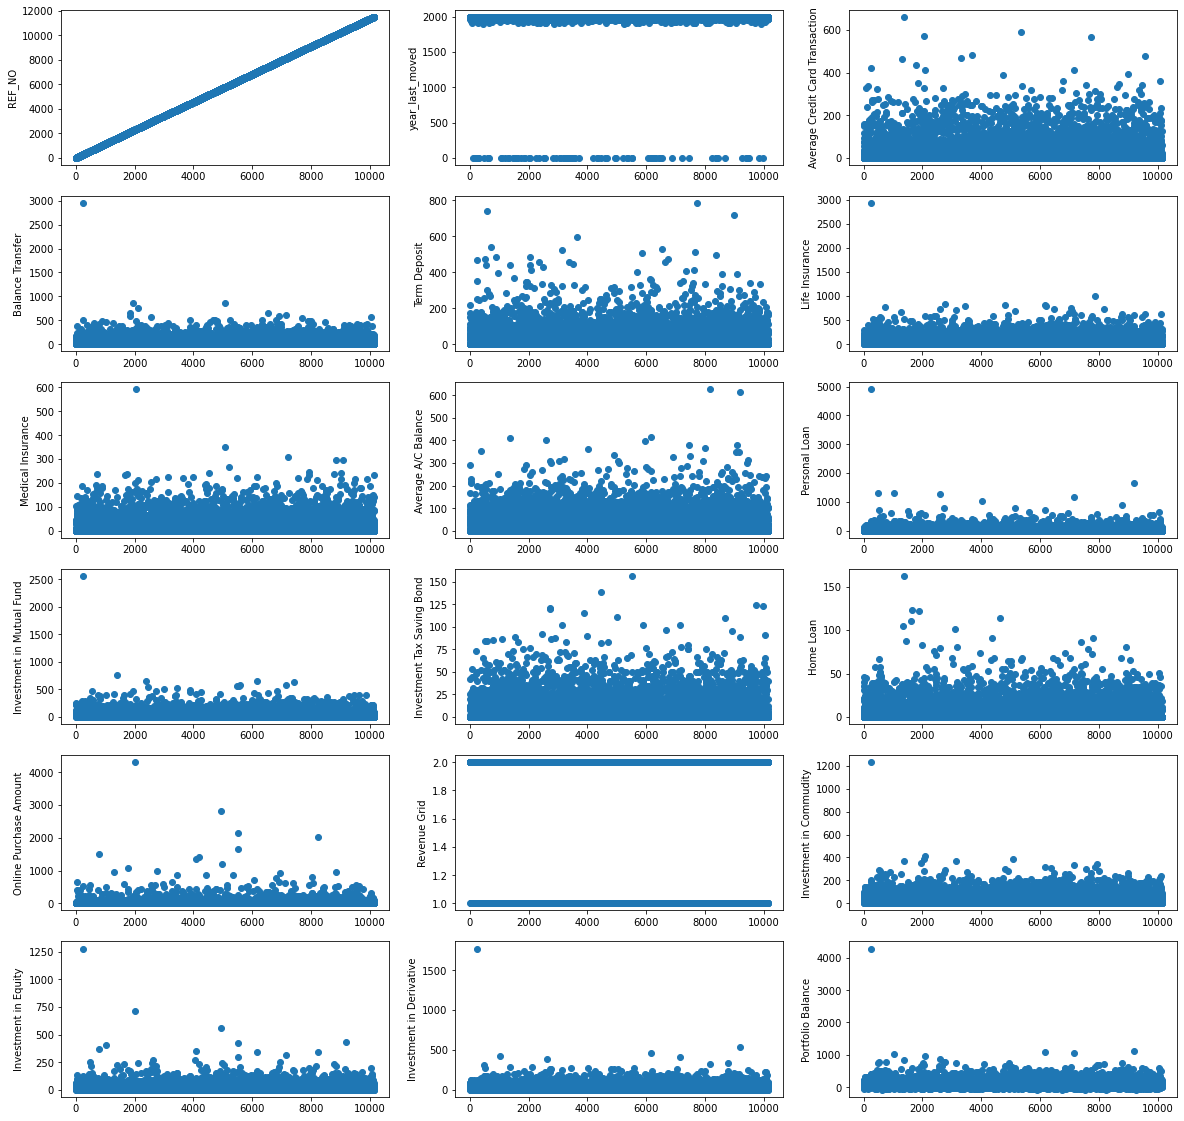

In [11]:
# visualize the numeric columns

import matplotlib.pyplot as plt

numeric_column_names = list(numeric_columns.columns)
col_index = 0
plot_rows = 6
plot_cols = 3
fig, ax = plt.subplots(nrows = plot_rows, ncols = plot_cols, figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_columns[numeric_column_names[col_index]], x = numeric_columns.index)
        ax[row_count][col_count].set_ylabel(numeric_column_names[col_index])
        col_index = col_index + 1
        
        
###### Insights #####
#####################

## Ref Number column just contains the index so can be removed.
## year_last_moved column seem to have many values close to 0 or 0, these seem to be noise, investigate them.
## Average_credit_card_transaction,Balance Transfer seems to be highly right skewed, check if the skewness could be reduced. ###Later
## A single customer with very high value of balance transfer/life insurance etc stands out, this row could be considered outlier and be removed, #row number 250
## Capping could be done to limit the impact of outliers.
## Scaling could be done since the scale is different for most of the variables.

In [12]:
# Analyze the categorical columns

categorical_columns = data.select_dtypes(include = np.object)
categorical_columns

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,HTV,NP4 9HS,NP4,Female,Wales
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,Granada,M41 0QH,M41,Female,North West
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,Tyne Tees,NE30 1JZ,NE30,Male,North
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,Central,HR9 7RJ,HR9,Female,West Midlands
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,Scottish TV,KA10 7LS,KA10,Female,Scotland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,Carlton,SM4 5RF,SM4,Female,South East
10151,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,Meridian,RG14 7PA,RG14,Female,South East
10152,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,Central,OX15 0PU,OX15,Female,South East
10153,Zero,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,Carlton,CM15 0LU,CM15,Female,South East


In [13]:
# large number of unique values indicate no impact on target

categorical_column_names = list(categorical_columns.columns)
categorical_column_names

for column in categorical_column_names:
    print('Column: ', column)
    print('Number of unique values: ', data[column].nunique())

Column:  children
Number of unique values:  5
Column:  age_band
Number of unique values:  13
Column:  status
Number of unique values:  5
Column:  occupation
Number of unique values:  9
Column:  occupation_partner
Number of unique values:  9
Column:  home_status
Number of unique values:  5
Column:  family_income
Number of unique values:  13
Column:  self_employed
Number of unique values:  2
Column:  self_employed_partner
Number of unique values:  2
Column:  TVarea
Number of unique values:  14
Column:  post_code
Number of unique values:  10040
Column:  post_area
Number of unique values:  2039
Column:  gender
Number of unique values:  3
Column:  region
Number of unique values:  13


Section 2. Data Pre-processing

In [14]:
# The shape of data before pre-processing

data.shape

(10155, 32)

In [15]:
# remove unwanted columns
# 4 columns removed as analyzed in earlier section

removed_cols = []
data.drop(['REF_NO','year_last_moved','post_code','post_area'], axis = 1, inplace = True)
data.shape

for item in ['REF_NO','year_last_moved','post_code','post_area']:
    removed_cols.append(item)

In [16]:
# For outliers, we can either drop gthe rows or cap the values
# here we are dropping rows. 1 row gets dropped

pd.set_option('display.max_columns', None) # To see all columns
data[data['Balance Transfer'] > 2000]

data = data[data['Balance Transfer'] < 2000]
data.shape

(10154, 28)

In [22]:
# capping option is applied for numeric columns
# we had decided some numeric columns dont have an impact on target. these columns have been dropped. so no capping for these
# also no capping needed for target variable

# Here we are capping all columns at 99.95 percentile value. This is not a good practice. 
# Each column might have to be treated separately

numeric_column_names
for item in numeric_column_names:
    if item in removed_cols:
        numeric_column_names.remove(item)
        
numeric_column_names

# numeric_column_names.remove('Revenue Grid')
# numeric_column_names

for column in numeric_column_names:
    percentile_9995_val = np.quantile(data[column],0.9995)
    print(column,percentile_9995_val)
    data.loc[data[column]>percentile_9995_val,column] = percentile_9995_val  
#     ## replace all the values greater than 99.95th percentile with the 99.95th percentile value

Average Credit Card Transaction 477.0595900000078
Balance Transfer 601.467500000004
Term Deposit 531.109205000007
Life Insurance 794.1689650000166
Medical Insurance 264.1921900000169
Average A/C Balance 396.7357850000136
Personal Loan 1023.025560000106
Investment in Mutual Fund 575.7975700000084
Investment Tax Saving Bond 119.57088500000307
Home Loan 104.2984250000028
Online Purchase Amount 1505.0639500000832
Investment in Commudity 348.46969000000513
Investment in Equity 366.65306000001567
Investment in Derivative 329.4782800000082
Portfolio Balance 860.9368800000143


In [23]:
# look at the dataset now after unnecessary rows / columns have been dropped and column values capped for outlier treatment
data

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,HTV,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,Granada,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,Tyne Tees,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,Central,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,Scottish TV,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,Carlton,0.00,0.00,0.00,29.97,6.49,0.00,8.99,7.49,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,Meridian,0.00,110.95,0.00,200.41,0.00,2.99,0.00,14.99,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,Central,124.93,0.00,54.48,0.00,84.42,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,Zero,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,Carlton,0.00,35.98,0.00,0.00,0.00,0.00,0.00,9.98,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [24]:
# lets scale the data now

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[numeric_column_names])
data[numeric_column_names] = scaler.transform(data[numeric_column_names])
data[numeric_column_names]

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,2.482124,1.340106,-0.517609,0.176186,-0.598809,-0.045165,-0.383372,0.340706,1.087487,-0.453848,-0.252558,0.945977,-0.100791,0.016182,-0.005357
1,-0.464410,0.400036,-0.517609,-0.439065,-0.598809,-0.712227,-0.383372,-0.720036,-0.478161,-0.453848,-0.252558,-0.401712,-0.761765,-0.794981,-0.685122
2,-0.464410,1.664989,-0.122341,2.478129,-0.238719,3.000992,-0.383372,-0.446247,-0.478161,-0.099627,-0.252558,1.524583,0.338796,1.425790,0.834533
3,-0.464410,-0.636988,-0.517609,-0.499524,-0.598809,0.165475,-0.383372,0.058013,-0.478161,-0.453848,-0.252558,-0.799735,-0.260544,-0.411280,-1.342756
4,0.993573,0.164638,-0.517609,1.225532,0.717027,0.165697,-0.217582,2.924330,-0.478161,4.205835,0.099637,0.834412,1.216907,1.410720,1.479520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,-0.464410,-0.636988,-0.517609,-0.395315,-0.395239,-0.712227,-0.247506,-0.591788,-0.126497,-0.453848,-0.252558,-0.720823,-0.637788,-0.643124,-0.813120
10151,-0.464410,0.897525,-0.517609,1.478250,-0.598809,-0.645721,-0.383372,-0.463369,-0.478161,-0.453848,-0.252558,0.639234,-0.655499,0.134422,0.129168
10152,2.015450,-0.636988,0.508316,-0.724760,2.049175,-0.712227,-0.383372,-0.720036,-0.478161,-0.453848,-0.252558,0.404230,-0.761765,-0.512712,-0.140494
10153,-0.464410,-0.139360,-0.517609,-0.724760,-0.598809,-0.712227,-0.383372,-0.549153,-0.478161,0.356090,-0.252558,-0.723050,-0.655853,-0.872359,-0.868603


So far we have removed unwanted categorical and numeric columns.
We have dropped / capped outlier rows for numeric columns. We have scaled numeric columns
Now we move on to categorical columns

In [25]:
categorical_column_names

['children',
 'age_band',
 'status',
 'occupation',
 'occupation_partner',
 'home_status',
 'family_income',
 'self_employed',
 'self_employed_partner',
 'TVarea',
 'post_code',
 'post_area',
 'gender',
 'region']

In [26]:
# capping a categorical column
# one hot encoding

data['children'].value_counts()
data['children'] == '4+'
data.loc[data['children'] == '4+','children'] = '3'
data['children'].value_counts()

children_dummies = pd.get_dummies(data['children'], prefix = 'children')
children_dummies


data.drop(['children'], axis = 1, inplace = True)
data = pd.concat([data, children_dummies], axis = 1)

In [27]:
data['age_band'].value_counts()
age_band_dummies = pd.get_dummies(data['age_band'], prefix = 'age_band')
age_band_dummies

data.drop(['age_band'], axis = 1, inplace = True)
data = pd.concat([data, age_band_dummies], axis = 1)

In [28]:
data['status'].value_counts()
status_dummies = pd.get_dummies(data['status'], prefix = 'status')
status_dummies

data.drop(['status'], axis = 1, inplace = True)
data = pd.concat([data, status_dummies], axis = 1)

In [29]:
data['occupation'].value_counts()
occupation_dummies = pd.get_dummies(data['occupation'], prefix = 'occupation')
occupation_dummies

data.drop(['occupation'], axis = 1, inplace = True)
data = pd.concat([data, occupation_dummies], axis = 1)

In [30]:
data['occupation_partner'].value_counts()
occupation_partner_dummies = pd.get_dummies(data['occupation_partner'], prefix = 'occupation_partner')
occupation_partner_dummies

data.drop(['occupation_partner'], axis = 1, inplace = True)
data = pd.concat([data, occupation_partner_dummies], axis = 1)

In [31]:
data['home_status'].value_counts()
home_status_dummies = pd.get_dummies(data['home_status'], prefix = 'home_status')
home_status_dummies

data.drop(['home_status'], axis = 1, inplace = True)
data = pd.concat([data, home_status_dummies], axis = 1)

In [32]:
data['family_income'].value_counts()
family_income_dummies = pd.get_dummies(data['family_income'], prefix = 'family_income')
family_income_dummies

data.drop(['family_income'], axis = 1, inplace = True)
data = pd.concat([data, family_income_dummies], axis = 1)

In [33]:
# dummies for multiple columns in a single shot

cols = ['self_employed', 'self_employed_partner', 'gender']
for column in cols:
    dummies = pd.get_dummies(data[column], prefix = column)
    data.drop([column], axis = 1, inplace = True)
    data = pd.concat([data, dummies], axis = 1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10154
Data columns (total 83 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   TVarea                                10154 non-null  object 
 1   Average Credit Card Transaction       10154 non-null  float64
 2   Balance Transfer                      10154 non-null  float64
 3   Term Deposit                          10154 non-null  float64
 4   Life Insurance                        10154 non-null  float64
 5   Medical Insurance                     10154 non-null  float64
 6   Average A/C Balance                   10154 non-null  float64
 7   Personal Loan                         10154 non-null  float64
 8   Investment in Mutual Fund             10154 non-null  float64
 9   Investment Tax Saving Bond            10154 non-null  float64
 10  Home Loan                             10154 non-null  float64
 11  Online Purchase

In [35]:
# dropping for now as we dont know what TVarea means. might need in the 2nd iteration
data['TVarea'].value_counts()
data.drop(['TVarea'], axis = 1, inplace = True)

In [36]:
data['region'].value_counts()
region_dummies = pd.get_dummies(data['region'], prefix = 'region')
region_dummies

data.drop(['region'], axis = 1, inplace = True)
data = pd.concat([data, region_dummies], axis = 1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10154 entries, 0 to 10154
Data columns (total 94 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Average Credit Card Transaction       10154 non-null  float64
 1   Balance Transfer                      10154 non-null  float64
 2   Term Deposit                          10154 non-null  float64
 3   Life Insurance                        10154 non-null  float64
 4   Medical Insurance                     10154 non-null  float64
 5   Average A/C Balance                   10154 non-null  float64
 6   Personal Loan                         10154 non-null  float64
 7   Investment in Mutual Fund             10154 non-null  float64
 8   Investment Tax Saving Bond            10154 non-null  float64
 9   Home Loan                             10154 non-null  float64
 10  Online Purchase Amount                10154 non-null  float64
 11  Revenue Grid   

In [38]:
# the shape after all preprocessing is
data.shape

(10154, 94)

So far we have removed unwanted categorical and numeric columns.
We have dropped / capped outlier rows for numeric columns. We have scaled numeric columns.
We have done one-hot encoding for all categorical columns.

In [39]:
# Since this is a classification problem, lets convert the target variable into 0's and 1's
# one way is to use label encoding. another way is to just re-assign

data.loc[data['Revenue Grid'] == 2, 'Revenue Grid'] = 0
data['Revenue Grid'].value_counts()

0    9068
1    1086
Name: Revenue Grid, dtype: int64

In [50]:
# split the data into dependent and independent variables

features_df = data.drop(['Revenue Grid'], axis = 1)
target_df = pd.DataFrame(data['Revenue Grid'])

# features_df.info()
# target_df.info()

# features_df.reset_index()
# target_df.reset_index()

feature_columns = features_df.columns
target_columns = target_df.columns

feature_columns
# target_columns

Index(['Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'children_1',
       'children_2', 'children_3', 'children_Zero', 'age_band_18-21',
       'age_band_22-25', 'age_band_26-30', 'age_band_31-35', 'age_band_36-40',
       'age_band_41-45', 'age_band_45-50', 'age_band_51-55', 'age_band_55-60',
       'age_band_61-65', 'age_band_65-70', 'age_band_71+', 'age_band_Unknown',
       'status_Divorced/Separated', 'status_Partner',
       'status_Single/Never Married', 'status_Unknown', 'status_Widowed',
       'occupation_Business Manager', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupatio

In [85]:
# ignore for now
# from sklearn.decomposition import PCA

# pca_obj = PCA(n_components = 93) #### Instance of PCA
# pca_obj.fit(features_df)  ## identify how can it convert these 84 columns into 84
# transormed_features_df_pca = pca_obj.transform(features_df)  ### actually convert the 84 columns to 84

In [59]:
# split the data into training and test data set
# using StratifiedShuffleSplit instead of train_test_split to take care of class imbalance in the target variable

from sklearn.model_selection import StratifiedShuffleSplit

split_ins = StratifiedShuffleSplit(n_splits=5, random_state=2364)
splits = split_ins.split(features_df,target_df) ### return the rows that should be in training set and rows that goes in val set
splits

for train_index, val_index in splits:
    print(train_index, val_index)
    X_train = features_df.iloc[train_index,:]   ## features for the training set
    y_train = target_df.iloc[train_index]    ##### target values for the training set
    X_test = features_df.iloc[val_index,:]   #### features for the validation set
    y_test = target_df.iloc[val_index]            #### targets for the validation set

[1996  126 4701 ... 6791 6336 5136] [3083 7384 9878 ... 5402 7147  185]
[6343 2217 9462 ... 8183 4894 3028] [4772 2001 2367 ... 9578 6934  526]
[4404 4644 9115 ... 6929 8997   21] [1118 6863 4753 ... 2945 6373 7381]
[1301 8101 1648 ... 5433 5470 3325] [6579 4232  396 ... 8005 1190 8268]
[ 475 5834 8656 ... 8896   85 4893] [1353 3533 7070 ... 3728 3210 9166]


In [60]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(9138, 93) (9138, 1) (1016, 93) (1016, 1)


In [61]:
X_train.info()
# y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9138 entries, 476 to 4894
Data columns (total 93 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Average Credit Card Transaction       9138 non-null   float64
 1   Balance Transfer                      9138 non-null   float64
 2   Term Deposit                          9138 non-null   float64
 3   Life Insurance                        9138 non-null   float64
 4   Medical Insurance                     9138 non-null   float64
 5   Average A/C Balance                   9138 non-null   float64
 6   Personal Loan                         9138 non-null   float64
 7   Investment in Mutual Fund             9138 non-null   float64
 8   Investment Tax Saving Bond            9138 non-null   float64
 9   Home Loan                             9138 non-null   float64
 10  Online Purchase Amount                9138 non-null   float64
 11  Investment in C

In [55]:
# lets start with Logistic Regression model

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight = 'balanced', max_iter = 200, random_state = 20)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print('accuracy: ', accuracy)
print('precision: ', precision)
print('error: ', error)
print('recall: ', recall)
print('f1 score: ', f1_score)

print('\n')
print('The confusion matrix is: ')
print(cm)

print('\n')
print('***************** CLASSIFICATION REPORT USING LOGISTIC REGRESSION CLASSIFIER *******************')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

C:\Users\Vinod\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy:  0.9153543307086615
precision:  0.9437524420223012
error:  0.08464566929133854
recall:  0.9153543307086615
f1 score:  0.9237687905802202


The confusion matrix is: 
[[830  77]
 [  9 100]]


***************** CLASSIFICATION REPORT USING LOGISTIC REGRESSION CLASSIFIER *******************
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       907
           1       0.56      0.92      0.70       109

    accuracy                           0.92      1016
   macro avg       0.78      0.92      0.83      1016
weighted avg       0.94      0.92      0.92      1016



In [56]:
# show actuals vs predictions for training dataset
# without index = False, the output csv file has an unnamed additional column at the beginning
new_train_df = pd.DataFrame(X_train, columns = feature_columns)
new_train_df['Actual'] = y_train
new_train_df['Predicted'] = y_train_pred
new_train_df.to_csv('revenue_grid_actuals_vs_predicted_training_dataset_LR.csv', index = False)
print('Actuals vs Predictions for training dataset using Logistic Regression classifier created')

# show actuals vs predictions for test dataset
new_test_df = pd.DataFrame(X_test, columns = feature_columns)
new_test_df['Actual'] = y_test
new_test_df['Predicted'] = y_test_pred
new_test_df.to_csv('revenue_grid_actuals_vs_predicted_test_dataset_LR.csv', index = False)
print('Actuals vs Predictions for testing dataset using Logistic Regression classifier created')

# new_train_df.info()

Actuals vs Predictions for training dataset using Logistic Regression classifier created
Actuals vs Predictions for testing dataset using Logistic Regression classifier created


In [63]:
# Do this again before applying the next model
# Else features will include Actual and Predicted columns from previous model
# DecisionTree will build a model based on these columns as well resulting in a 100% accuracy model

# split the data into training and test data set
# using StratifiedShuffleSplit instead of train_test_split to take care of class imbalance in the target variable

from sklearn.model_selection import StratifiedShuffleSplit

split_ins = StratifiedShuffleSplit(n_splits=5, random_state=2364)
splits = split_ins.split(features_df,target_df) ### return the rows that should be in training set and rows that goes in val set
splits

for train_index, val_index in splits:
    print(train_index, val_index)
    X_train = features_df.iloc[train_index,:]   ## features for the training set
    y_train = target_df.iloc[train_index]    ##### target values for the training set
    X_test = features_df.iloc[val_index,:]   #### features for the validation set
    y_test = target_df.iloc[val_index]            #### targets for the validation set

[1996  126 4701 ... 6791 6336 5136] [3083 7384 9878 ... 5402 7147  185]
[6343 2217 9462 ... 8183 4894 3028] [4772 2001 2367 ... 9578 6934  526]
[4404 4644 9115 ... 6929 8997   21] [1118 6863 4753 ... 2945 6373 7381]
[1301 8101 1648 ... 5433 5470 3325] [6579 4232  396 ... 8005 1190 8268]
[ 475 5834 8656 ... 8896   85 4893] [1353 3533 7070 ... 3728 3210 9166]


In [64]:
# Use a base Decision Tree Classifier
# we can see that accuracy and all other parameters like precision, f1-score have improved

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight ='balanced', max_depth = 5, criterion = 'gini', min_samples_split=25)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print('accuracy: ', accuracy)
print('error: ', error)
print('precision: ', precision)
print('recall: ', recall)
print('f1-score: ', f1_score)

print('\n')
print('The confusion matrix is: ')
print(cm)

print('\n')
print('***************** CLASSIFICATION REPORT USING BASE DECISION TREE CLASSIFIER *******************')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

accuracy:  0.9311023622047244
error:  0.06889763779527558
precision:  0.9482515239583174
recall:  0.9311023622047244
f1-score:  0.9363823691884134


The confusion matrix is: 
[[848  59]
 [ 11  98]]


***************** CLASSIFICATION REPORT USING BASE DECISION TREE CLASSIFIER *******************
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       907
           1       0.62      0.90      0.74       109

    accuracy                           0.93      1016
   macro avg       0.81      0.92      0.85      1016
weighted avg       0.95      0.93      0.94      1016



In [68]:
# show actuals vs predictions for training dataset
# without index = False, the output csv file has an unnamed additional column at the beginning
new_train_df = pd.DataFrame(X_train, columns = feature_columns)
new_train_df['Actual'] = y_train
new_train_df['Predicted'] = y_train_pred
new_train_df.to_csv('revenue_grid_actuals_vs_predicted_training_dataset_DT.csv', index = False)
print('Actuals vs Predictions for training dataset using Decision Tree classifier created')

# show actuals vs predictions for test dataset
new_test_df = pd.DataFrame(X_test, columns = feature_columns)
new_test_df['Actual'] = y_test
new_test_df['Predicted'] = y_test_pred
new_test_df.to_csv('revenue_grid_actuals_vs_predicted_test_dataset_DT.csv', index = False)
print('Actuals vs Predictions for testing dataset using Decision Tree classifier created')

Actuals vs Predictions for training dataset using Decision Tree classifier created
Actuals vs Predictions for testing dataset using Decision Tree classifier created


In [70]:
# X_train.info()

In [71]:
# Do this again before applying the next model
# Else features will include Actual and Predicted columns from previous model
# DecisionTree will build a model based on these columns as well resulting in a 100% accuracy model

# split the data into training and test data set
# using StratifiedShuffleSplit instead of train_test_split to take care of class imbalance in the target variable

from sklearn.model_selection import StratifiedShuffleSplit

split_ins = StratifiedShuffleSplit(n_splits=5, random_state=2364)
splits = split_ins.split(features_df,target_df) ### return the rows that should be in training set and rows that goes in val set
splits

for train_index, val_index in splits:
    print(train_index, val_index)
    X_train = features_df.iloc[train_index,:]   ## features for the training set
    y_train = target_df.iloc[train_index]    ##### target values for the training set
    X_test = features_df.iloc[val_index,:]   #### features for the validation set
    y_test = target_df.iloc[val_index]            #### targets for the validation set

[1996  126 4701 ... 6791 6336 5136] [3083 7384 9878 ... 5402 7147  185]
[6343 2217 9462 ... 8183 4894 3028] [4772 2001 2367 ... 9578 6934  526]
[4404 4644 9115 ... 6929 8997   21] [1118 6863 4753 ... 2945 6373 7381]
[1301 8101 1648 ... 5433 5470 3325] [6579 4232  396 ... 8005 1190 8268]
[ 475 5834 8656 ... 8896   85 4893] [1353 3533 7070 ... 3728 3210 9166]


In [75]:
# use a random forest classifier
# use grid search for best hyper parameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
param_dist = {
             'max_depth':[5,12],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']
             }

# removed below params as the evaluation was taking lot of time. also removed 10, 15 from max_depth and added 12 instead
#  'min_samples_split':[10,20,50],
#  'max_samples':[0.6,0.7,0.8]

rf = RandomForestClassifier(random_state = 10)
cv_rf = GridSearchCV(rf, cv = 10, param_grid = param_dist, n_jobs = 4)

cv_rf.fit(X_train,y_train)
print('Best Parameters using Grid search: \n', cv_rf.best_params_)
end = time.time()

print('Time taken in grid search: %0.2f'%(end-start))

C:\Users\Vinod\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': None}
Time taken in grid search: 489.93


In [76]:
rf.set_params(criterion = 'gini', bootstrap = True, max_depth = 12, max_features = None)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_test_pred)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred, average = 'weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average = 'weighted')

print('accuracy: ', accuracy)
print('error: ', error)
print('precision: ', precision)
print('recall: ', recall)
print('f1_score: ', f1_score)

print('\n')
print('The confusion matrix is: ')
print(cm)

print('\n')
print('***************** CLASSIFICATION REPORT USING BASE DECISION TREE CLASSIFIER *******************')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

<ipython-input-76-7092a6be3d22>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


accuracy:  0.96751968503937
error:  0.032480314960629975
precision:  0.9664904383057947
recall:  0.96751968503937
f1_score:  0.9664528622285933


The confusion matrix is: 
[[898   9]
 [ 24  85]]


***************** CLASSIFICATION REPORT USING BASE DECISION TREE CLASSIFIER *******************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       907
           1       0.90      0.78      0.84       109

    accuracy                           0.97      1016
   macro avg       0.94      0.88      0.91      1016
weighted avg       0.97      0.97      0.97      1016



In [77]:
# show actuals vs predictions for training dataset
# without index = False, the output csv file has an unnamed additional column at the beginning
new_train_df = pd.DataFrame(X_train, columns = feature_columns)
new_train_df['Actual'] = y_train
new_train_df['Predicted'] = y_train_pred
new_train_df.to_csv('revenue_grid_actuals_vs_predicted_training_dataset_RF.csv', index = False)
print('Actuals vs Predictions for training dataset using Random Forest classifier created')

# show actuals vs predictions for test dataset
new_test_df = pd.DataFrame(X_test, columns = feature_columns)
new_test_df['Actual'] = y_test
new_test_df['Predicted'] = y_test_pred
new_test_df.to_csv('revenue_grid_actuals_vs_predicted_test_dataset_RF.csv', index = False)
print('Actuals vs Predictions for testing dataset using Random Forest classifier created')

Actuals vs Predictions for training dataset using Random Forest classifier created
Actuals vs Predictions for testing dataset using Random Forest classifier created


In [79]:
# Do this again before applying the next model
# Else features will include Actual and Predicted columns from previous model
# DecisionTree will build a model based on these columns as well resulting in a 100% accuracy model

# split the data into training and test data set
# using StratifiedShuffleSplit instead of train_test_split to take care of class imbalance in the target variable

from sklearn.model_selection import StratifiedShuffleSplit

split_ins = StratifiedShuffleSplit(n_splits=5, random_state=2364)
splits = split_ins.split(features_df,target_df) ### return the rows that should be in training set and rows that goes in val set
splits

for train_index, val_index in splits:
    print(train_index, val_index)
    X_train = features_df.iloc[train_index,:]   ## features for the training set
    y_train = target_df.iloc[train_index]    ##### target values for the training set
    X_test = features_df.iloc[val_index,:]   #### features for the validation set
    y_test = target_df.iloc[val_index]            #### targets for the validation set

[1996  126 4701 ... 6791 6336 5136] [3083 7384 9878 ... 5402 7147  185]
[6343 2217 9462 ... 8183 4894 3028] [4772 2001 2367 ... 9578 6934  526]
[4404 4644 9115 ... 6929 8997   21] [1118 6863 4753 ... 2945 6373 7381]
[1301 8101 1648 ... 5433 5470 3325] [6579 4232  396 ... 8005 1190 8268]
[ 475 5834 8656 ... 8896   85 4893] [1353 3533 7070 ... 3728 3210 9166]


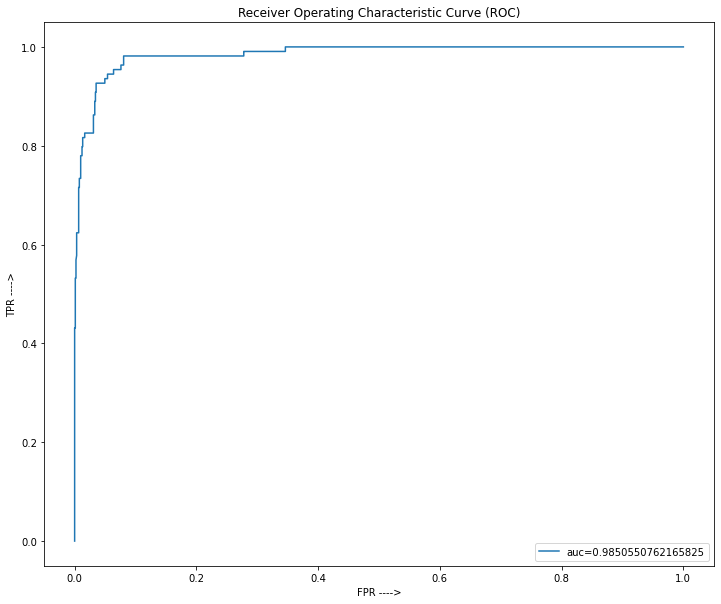

In [80]:
import matplotlib.pyplot as plt

y_test_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_proba)
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()